# **Cross validation LSTM**

#### Left to do Validation
  - regularization 

### Left to do best pred:
  - full single run on test set (fix the seed !)

### Left to do code:

### Package requirements

In [ ]:
!pip install focal-loss

In [ ]:
!pip install plot_keras_history

Load training set

In [3]:
!unzip data_fly.zip

Archive:  data_fly.zip
replace data_fly/CS_170910_avi_ROI1_E02/all_ann.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [8]:
from Load import*
from Train import*
from Utils import*
from Data_augmentation import*
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## **Building training / validation / testing data sets**

### Load training data in full length

In [5]:
X, Y = load_training_data()
train, test, val = train_te_val_split(X,Y)

### Load augmented training data (gaussian noise)

In [ ]:
X, Y = load_training_data()
T=2
train, test, val = data_augmentation(X,Y,T)

### Load split data 
(the size T of the split can be tuned)

In [ ]:
X, Y = load_training_data()
train, test, val = data_augmentation_2(X,Y)

### Evaluate on test set
Stack train and validation data to train and evaluate model against test set

In [6]:
X_tr = np.vstack((train[0], val[0]))
Y_tr = np.vstack((train[1], val[1]))

## **Building a model**

In [ ]:
run_exp_hist(train[0], train[1], val[0], val[1], repeats = 5, gamma = 2, node = 100)

### Cross validation 
Train and validation loss evolutions are printed for each parameter.

Cross validation number of nodes and model type
(average on 5 repeats -> 5 fold cross validation)

weighted F1 score : 69.427% (+/-2.785)
Macro F1 score : 38.578% (+/-2.804)
Proportional F1 score : 0.044% (+/-0.006)
Accuracy : 93.608% (+/-0.528)
Loss : 0.050% (+/-0.005)
Mean F1 score per label:  [[1.76216748e-01 7.34141064e-01 4.42334603e-01 7.58916779e-01
  5.89101636e-04 0.00000000e+00 1.19202030e-01 8.54874142e-01]]
Mean precision per label:  [[0.28255926 0.79064736 0.52480371 0.80110295 0.01428571 0.
  0.26315228 0.8640355 ]]
Mean recall per label:  [[1.35617962e-01 6.85940897e-01 4.06113076e-01 7.22072411e-01
  3.00751883e-04 0.00000000e+00 8.29240028e-02 8.47820008e-01]]


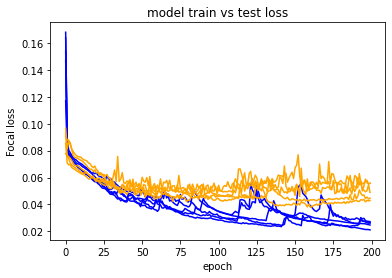

weighted F1 score : 68.619% (+/-1.809)
Macro F1 score : 37.811% (+/-3.332)
Proportional F1 score : 0.045% (+/-0.008)
Accuracy : 93.340% (+/-0.435)
Loss : 0.067% (+/-0.011)
Mean F1 score per label:  [[0.13080537 0.71094494 0.47193177 0.6622971  0.0559392  0.
  0.13861483 0.85437741]]
Mean precision per label:  [[0.28566137 0.78540318 0.62030678 0.76206564 0.246244   0.
  0.31985771 0.82844132]]
Mean recall per label:  [[0.09685418 0.6528753  0.43397356 0.5936244  0.0318221  0.
  0.10862635 0.88559647]]


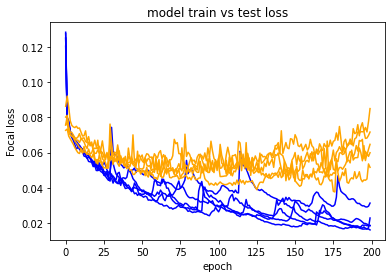

weighted F1 score : 71.436% (+/-2.767)
Macro F1 score : 40.327% (+/-5.089)
Proportional F1 score : 0.050% (+/-0.011)
Accuracy : 93.753% (+/-0.430)
Loss : 0.052% (+/-0.006)
Mean F1 score per label:  [[0.27010374 0.7146834  0.49905429 0.72858676 0.08282271 0.
  0.08663866 0.84429117]]
Mean precision per label:  [[0.33717741 0.77478561 0.5902633  0.76528062 0.22384256 0.
  0.18324101 0.86950372]]
Mean recall per label:  [[0.27526202 0.66590092 0.44894808 0.70007898 0.05277646 0.
  0.06688015 0.82124907]]


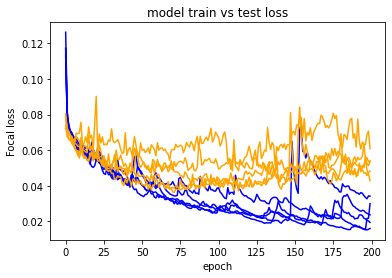

weighted F1 score : 71.697% (+/-4.545)
Macro F1 score : 42.631% (+/-1.869)
Proportional F1 score : 0.054% (+/-0.003)
Accuracy : 93.855% (+/-0.921)
Loss : 0.058% (+/-0.008)
Mean F1 score per label:  [[0.18742477 0.75171893 0.61465928 0.77483239 0.06354863 0.
  0.15938123 0.85893275]]
Mean precision per label:  [[0.30246535 0.78968617 0.61926053 0.80387951 0.29886313 0.
  0.30888486 0.86171741]]
Mean recall per label:  [[0.14639689 0.72176419 0.62212559 0.75707395 0.03899184 0.
  0.11121798 0.86081419]]


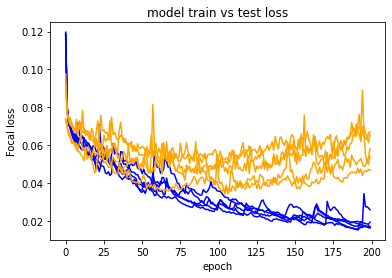

weighted F1 score : 73.807% (+/-2.384)
Macro F1 score : 42.324% (+/-2.036)
Proportional F1 score : 0.052% (+/-0.005)
Accuracy : 94.410% (+/-0.529)
Loss : 0.055% (+/-0.013)
Mean F1 score per label:  [[0.28480625 0.76266559 0.52249858 0.75968613 0.04498153 0.
  0.13761345 0.87362887]]
Mean precision per label:  [[0.44860208 0.81678603 0.59604452 0.79928851 0.11850495 0.
  0.41620858 0.85606961]]
Mean recall per label:  [[0.22039339 0.71714817 0.48962106 0.72654263 0.02878036 0.
  0.09826369 0.89389331]]


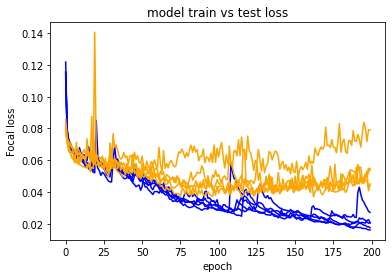

In [ ]:
for node in [100,200,300,400,500]:
  print('Node number: ', node)
  run_exp_hist(X_tr,Y_tr, test[0], test[1], node = node, m_type=0)

Node number:  600
weighted F1 score : 71.489% (+/-3.838)
Macro F1 score : 43.578% (+/-2.186)
Proportional F1 score : 5.933% (+/-0.333)
Accuracy : 93.544% (+/-0.787)
Loss : 0.055% (+/-0.005)
Mean F1 score per label:  [[0.22578536 0.72759306 0.59871213 0.80053665 0.10809066 0.
  0.17897366 0.84650941]]
Mean precision per label:  [[0.35079265 0.70493704 0.69379237 0.80554258 0.14849772 0.
  0.2791735  0.87260821]]
Mean recall per label:  [[0.17496215 0.75517969 0.53677872 0.79869611 0.08552625 0.
  0.14009248 0.82326849]]


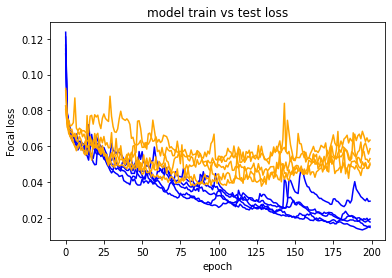

Node number:  700
weighted F1 score : 69.493% (+/-1.038)
Macro F1 score : 40.892% (+/-1.789)
Proportional F1 score : 5.316% (+/-0.564)
Accuracy : 93.083% (+/-0.317)
Loss : 0.062% (+/-0.006)
Mean F1 score per label:  [[0.1474858  0.73917978 0.55054036 0.78605172 0.08394816 0.
  0.14129067 0.82282778]]
Mean precision per label:  [[0.17080688 0.77822572 0.65299872 0.80377274 0.12416699 0.
  0.25127262 0.83474652]]
Mean recall per label:  [[0.13390355 0.71380603 0.48808172 0.774169   0.07195724 0.
  0.10014473 0.81449968]]


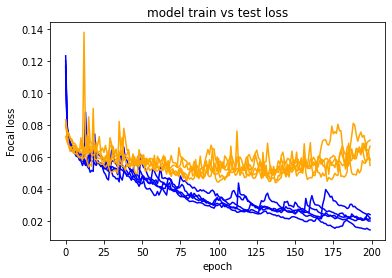

Node number:  800
weighted F1 score : 68.754% (+/-3.138)
Macro F1 score : 37.014% (+/-4.066)
Proportional F1 score : 4.394% (+/-0.857)
Accuracy : 93.219% (+/-1.009)
Loss : 0.053% (+/-0.006)
Mean F1 score per label:  [[0.12456918 0.73199143 0.46264972 0.65358938 0.03648833 0.
  0.11803    0.83378751]]
Mean precision per label:  [[0.27044665 0.7755469  0.65547585 0.78900886 0.2581153  0.
  0.16596945 0.84211392]]
Mean recall per label:  [[0.09353127 0.70245121 0.39390099 0.59104289 0.02380015 0.
  0.10418629 0.82872857]]


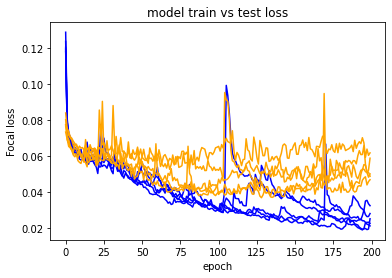

Node number:  900
weighted F1 score : 73.740% (+/-2.418)
Macro F1 score : 39.940% (+/-0.835)
Proportional F1 score : 4.870% (+/-0.241)
Accuracy : 94.388% (+/-0.521)
Loss : 0.046% (+/-0.005)
Mean F1 score per label:  [[0.13292423 0.75394492 0.51508575 0.80562124 0.03881346 0.
  0.07007154 0.87877762]]
Mean precision per label:  [[0.28196512 0.79596949 0.67116719 0.80504386 0.06178822 0.
  0.20521389 0.87867336]]
Mean recall per label:  [[0.09048956 0.71878422 0.42364305 0.81093773 0.04055556 0.
  0.05084926 0.88151959]]


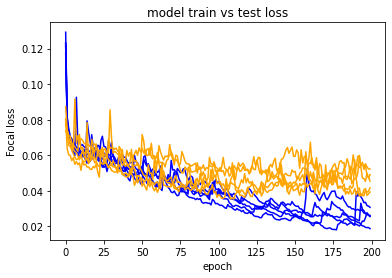

Node number:  1000
weighted F1 score : 70.951% (+/-5.416)
Macro F1 score : 37.598% (+/-6.890)
Proportional F1 score : 4.394% (+/-1.458)
Accuracy : 94.009% (+/-0.856)
Loss : 0.047% (+/-0.005)
Mean F1 score per label:  [[0.11020028 0.72479597 0.41773194 0.76566628 0.04811822 0.
  0.08545156 0.85587271]]
Mean precision per label:  [[0.16830331 0.78855722 0.66901542 0.804529   0.16336898 0.
  0.21929243 0.85648642]]
Mean recall per label:  [[0.11082777 0.67931522 0.38247546 0.74200832 0.02860118 0.
  0.05325685 0.85633163]]


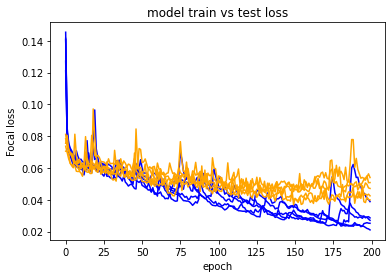

In [ ]:
for node in [600,700,800,900,1000]:
  print('Node number: ', node)
  run_exp_hist(X_tr,Y_tr, test[0], test[1], node = node, m_type=0, CV = True)

Cross validation on dropout.

Dropout value :  0
weighted F1 score : 64.845% (+/-7.546)
Macro F1 score : 33.936% (+/-9.150)
Proportional F1 score : 3.864% (+/-1.720)
Accuracy : 92.639% (+/-1.085)
Loss : 0.062% (+/-0.013)
Mean F1 score per label:  [[0.1157069  0.65504447 0.35670704 0.59951863 0.0483968  0.
  0.12161477 0.81791384]]
Mean precision per label:  [[0.18881378 0.72633693 0.4117131  0.63000946 0.12326242 0.
  0.2465474  0.80547545]]
Mean recall per label:  [[0.0851813  0.6067283  0.32920138 0.57576183 0.0301254  0.
  0.08588974 0.83727205]]


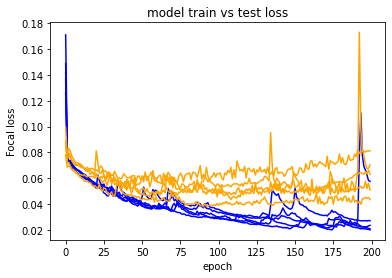

Dropout value :  0.1
weighted F1 score : 71.306% (+/-3.067)
Macro F1 score : 38.697% (+/-4.109)
Proportional F1 score : 4.647% (+/-0.782)
Accuracy : 93.823% (+/-0.933)
Loss : 0.051% (+/-0.008)
Mean F1 score per label:  [[0.14868244 0.74586415 0.51711854 0.6995527  0.0131579  0.
  0.11581902 0.85556873]]
Mean precision per label:  [[0.25666858 0.78856999 0.53947339 0.77661756 0.01893939 0.
  0.28887494 0.86195241]]
Mean recall per label:  [[0.11383095 0.70808462 0.49897498 0.6563431  0.01008065 0.
  0.08049692 0.85107124]]


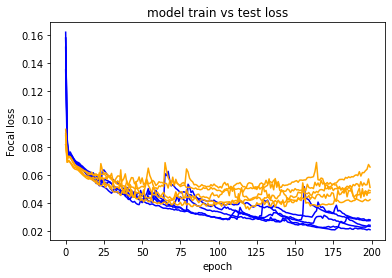

Dropout value :  0.2
weighted F1 score : 71.233% (+/-3.116)
Macro F1 score : 38.015% (+/-2.760)
Proportional F1 score : 4.563% (+/-0.589)
Accuracy : 93.817% (+/-0.396)
Loss : 0.053% (+/-0.008)
Mean F1 score per label:  [[0.10398283 0.74623157 0.46545184 0.73332397 0.05149136 0.
  0.08857658 0.85211283]]
Mean precision per label:  [[0.18868193 0.796837   0.62320505 0.78263353 0.13125371 0.
  0.15477729 0.86309454]]
Mean recall per label:  [[0.08565214 0.71480764 0.38163393 0.6980615  0.03218236 0.
  0.07309131 0.84478027]]


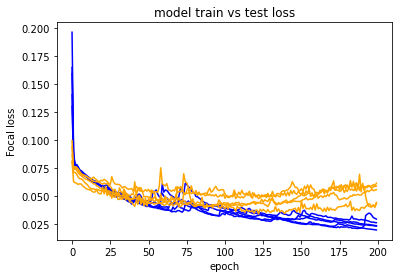

Dropout value :  0.3
weighted F1 score : 68.215% (+/-3.187)
Macro F1 score : 35.806% (+/-3.054)
Proportional F1 score : 4.198% (+/-0.589)
Accuracy : 93.373% (+/-0.440)
Loss : 0.055% (+/-0.005)
Mean F1 score per label:  [[0.09685678 0.68474598 0.43813858 0.69318208 0.03284284 0.
  0.0730847  0.84563018]]
Mean precision per label:  [[0.13165385 0.81105862 0.58028917 0.72973244 0.09875472 0.
  0.18349525 0.8264671 ]]
Mean recall per label:  [[0.08051439 0.60515733 0.36547425 0.66340858 0.02291107 0.
  0.05393876 0.86637416]]


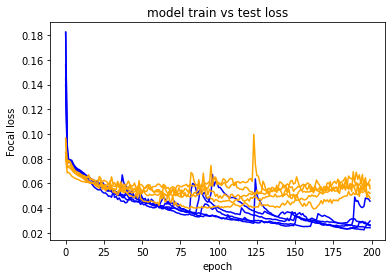

In [ ]:
for d in [0,0.1,0.2,0.3]:
  print('Dropout value : ', d)
  run_exp_hist(X_tr,Y_tr, test[0], test[1], node = 100, m_type=0, dropout = d, CV = True)

Cross validation on model type

Model type :  0
weighted F1 score : 68.500% (+/-3.784)
Macro F1 score : 37.140% (+/-4.772)
Proportional F1 score : 4.285% (+/-0.839)
Accuracy : 93.355% (+/-0.663)
Loss : 0.055% (+/-0.007)
Mean F1 score per label:  [[0.15815497 0.67888849 0.42295552 0.74586135 0.02572322 0.
  0.09463601 0.84497999]]
Mean precision per label:  [[0.28629912 0.67791641 0.54011363 0.77853613 0.05111594 0.
  0.22321209 0.8550746 ]]
Mean recall per label:  [[0.12086519 0.68628925 0.36814931 0.72160996 0.01849926 0.
  0.06348378 0.83751367]]


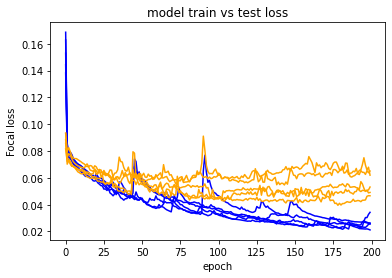

Model type :  1
weighted F1 score : 70.543% (+/-4.467)
Macro F1 score : 38.668% (+/-2.412)
Proportional F1 score : 4.414% (+/-0.506)
Accuracy : 93.914% (+/-0.935)
Loss : 0.053% (+/-0.009)
Mean F1 score per label:  [[0.09880454 0.75957227 0.45448806 0.76942354 0.03150422 0.
  0.1169266  0.86274257]]
Mean precision per label:  [[0.29213996 0.77914027 0.48664885 0.76027104 0.16455662 0.
  0.28968706 0.8687712 ]]
Mean recall per label:  [[0.05974308 0.75420959 0.43290371 0.78016739 0.01843043 0.
  0.07619584 0.85769738]]


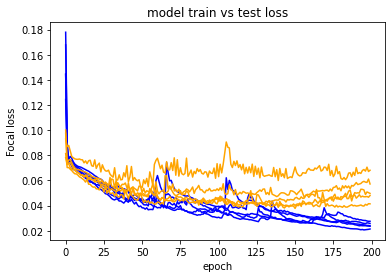

Model type :  2
weighted F1 score : 69.814% (+/-2.216)
Macro F1 score : 38.198% (+/-2.221)
Proportional F1 score : 4.116% (+/-0.565)
Accuracy : 93.727% (+/-0.357)
Loss : 0.051% (+/-0.003)
Mean F1 score per label:  [[0.13710959 0.76079355 0.35058426 0.76695948 0.00759948 0.
  0.17449414 0.85831587]]
Mean precision per label:  [[0.45567563 0.7887858  0.49379525 0.77709842 0.04765396 0.
  0.33567231 0.84781653]]
Mean recall per label:  [[0.08504673 0.738625   0.30217413 0.75772377 0.0048913  0.
  0.12401691 0.87057928]]


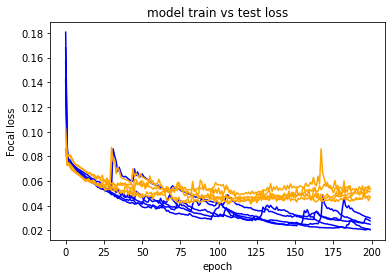

In [ ]:
for m in [0,1,2]:
  print('Model type : ', m)
  run_exp_hist(X_tr,Y_tr, test[0], test[1], dropout = 0.1, node = 100, m_type=m, CV = True)

Cross validation on data structure (split windows)

Split :  4
Training for final test evaluation.
weighted F1 score : 62.261% (+/-3.674)
Macro F1 score : 26.124% (+/-3.951)
Proportional F1 score : 2.397% (+/-0.700)
Accuracy : 92.663% (+/-0.780)
Loss : 0.067% (+/-0.007)
Mean F1 score per label:  [[0.04071208 0.59933235 0.26035453 0.36543684 0.         0.
  0.00329218 0.8208074 ]]
Mean precision per label:  [[0.49962394 0.63112763 0.65693433 0.74660662 0.         0.
  0.02352941 0.79120322]]
Mean recall per label:  [[0.0223393  0.57311356 0.18539493 0.27761733 0.         0.
  0.00176991 0.85947939]]


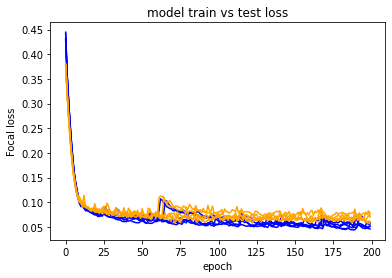

Split :  7
Training for final test evaluation.
weighted F1 score : 63.030% (+/-2.055)
Macro F1 score : 26.337% (+/-1.473)
Proportional F1 score : 2.336% (+/-0.324)
Accuracy : 92.786% (+/-0.572)
Loss : 0.068% (+/-0.009)
Mean F1 score per label:  [[0.0068     0.58370975 0.17577152 0.4975876  0.00283688 0.
  0.00879865 0.83148434]]
Mean precision per label:  [[0.06666667 0.59531461 0.56944775 0.60143507 0.01333333 0.
  0.1        0.85345454]]
Mean recall per label:  [[0.00358272 0.585348   0.10700447 0.4400722  0.0015873  0.
  0.00460177 0.81497397]]


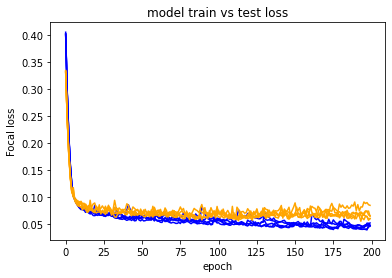

Split :  9
Training for final test evaluation.
weighted F1 score : 62.742% (+/-2.111)
Macro F1 score : 30.791% (+/-0.960)
Proportional F1 score : 3.410% (+/-0.244)
Accuracy : 92.046% (+/-0.691)
Loss : 0.092% (+/-0.009)
Mean F1 score per label:  [[0.15480678 0.57850359 0.35799067 0.51921391 0.01603564 0.
  0.03957528 0.79714955]]
Mean precision per label:  [[0.37854205 0.57403741 0.46243992 0.56323298 0.05070422 0.
  0.10318984 0.83414955]]
Mean recall per label:  [[0.1032666  0.58717949 0.31624441 0.49638989 0.00952381 0.
  0.02707965 0.7695788 ]]


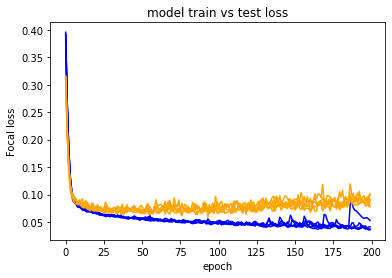

In [ ]:
for T in [4,7,9]:
  X, Y = load_training_data()
  train, test, val = data_augmentation(X,Y,T)
  print('Split : ', T)
  run_exp_hist(train[0],train[1], val[0], val[1], node = 100, m_type=1, dropout = 0.1, CV = False)

reg:  1e-07
Training for final test evaluation.
weighted F1 score : 63.194% (+/-0.606)
Macro F1 score : 32.364% (+/-1.112)
Proportional F1 score : 3.734% (+/-0.228)
Accuracy : 91.652% (+/-0.362)
Loss : 0.124% (+/-0.017)
Mean F1 score per label:  [[0.19703062 0.58019454 0.34975986 0.49760899 0.05326978 0.
  0.11775082 0.79351483]]
Mean precision per label:  [[0.24587484 0.56449536 0.36957023 0.68032824 0.10183256 0.
  0.21509857 0.81602224]]
Mean recall per label:  [[0.20779768 0.59853481 0.35171385 0.40379062 0.03703704 0.
  0.09150442 0.77457644]]


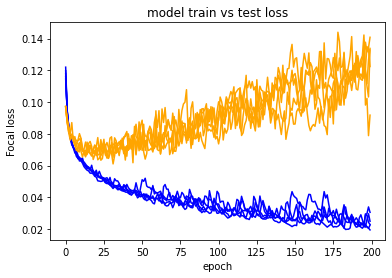

reg:  1e-06
Training for final test evaluation.
weighted F1 score : 63.033% (+/-0.810)
Macro F1 score : 33.466% (+/-1.369)
Proportional F1 score : 4.015% (+/-0.304)
Accuracy : 91.782% (+/-0.211)
Loss : 0.138% (+/-0.012)
Mean F1 score per label:  [[0.18489103 0.56570589 0.42028129 0.62884843 0.03479607 0.
  0.05832827 0.78446277]]
Mean precision per label:  [[0.33729706 0.546527   0.4107966  0.69597535 0.08505868 0.
  0.13007747 0.8117417 ]]
Mean recall per label:  [[0.12897787 0.58739928 0.43934426 0.58249097 0.02222222 0.
  0.03982301 0.76041647]]


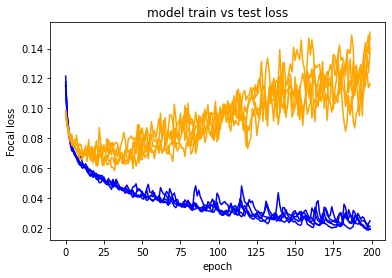

reg:  1e-05
Training for final test evaluation.
weighted F1 score : 63.267% (+/-3.780)
Macro F1 score : 32.616% (+/-1.595)
Proportional F1 score : 3.693% (+/-0.137)
Accuracy : 91.756% (+/-1.101)
Loss : 0.122% (+/-0.011)
Mean F1 score per label:  [[0.1722353  0.57968039 0.35956864 0.58809828 0.01983313 0.
  0.09977739 0.79010127]]
Mean precision per label:  [[0.30024669 0.58761005 0.34794243 0.65884978 0.11571057 0.
  0.16469263 0.81941059]]
Mean recall per label:  [[0.12623814 0.5752381  0.39642325 0.55938628 0.01111111 0.
  0.07469027 0.77022244]]


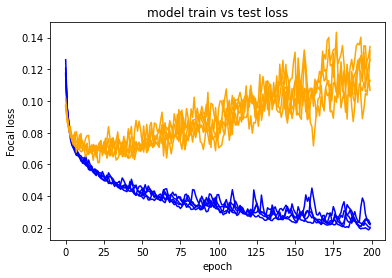

reg:  0.0001
Training for final test evaluation.
weighted F1 score : 63.311% (+/-1.467)
Macro F1 score : 32.263% (+/-2.665)
Proportional F1 score : 3.732% (+/-0.573)
Accuracy : 91.771% (+/-0.266)
Loss : 0.128% (+/-0.015)
Mean F1 score per label:  [[0.18290634 0.56083002 0.37253188 0.51751247 0.04020299 0.
  0.10722616 0.79980027]]
Mean precision per label:  [[0.28666672 0.55421619 0.45450131 0.55493772 0.12030579 0.
  0.21068045 0.7995478 ]]
Mean recall per label:  [[0.13719705 0.56842493 0.33412817 0.49169676 0.02486773 0.
  0.07327434 0.80119263]]


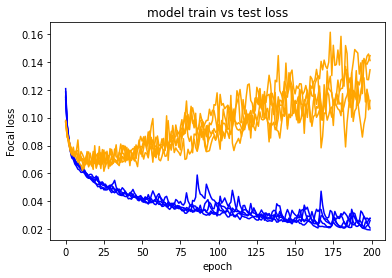

In [ ]:
X, Y = load_training_data()
train, test, val = data_augmentation(X,Y,5)
for reg in[1e-7, 1e-6, 1e-5, 1e-4]:
  print("reg: ", reg)
  run_exp_hist(train[0],train[1], val[0], val[1], node = 100, m_type=1, dropout = 0.1, CV = False)


Cross validation on data structure (data augmented)

weighted F1 score : 72.733% (+/-1.889)
Macro F1 score : 39.608% (+/-2.358)
Proportional F1 score : 4.389% (+/-0.502)
Accuracy : 94.423% (+/-0.358)
Loss : 0.041% (+/-0.003)
Mean F1 score per label:  [[0.18330574 0.79976735 0.46456209 0.76981435 0.01235834 0.
  0.06802535 0.87078589]]
Mean precision per label:  [[0.3290077  0.82078619 0.54166428 0.74719602 0.11235632 0.
  0.20477739 0.87408825]]
Mean recall per label:  [[0.13929057 0.77984791 0.41205915 0.79768614 0.00654898 0.
  0.04226126 0.86844125]]


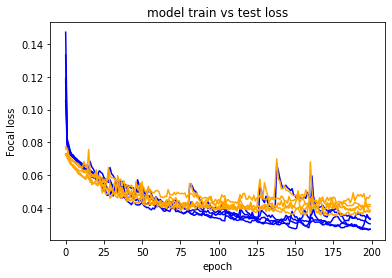

In [ ]:
X, Y = load_training_data()
train, test, val = data_augmentation_2(X,Y)
X_tr = np.vstack((train[0], val[0]))
Y_tr = np.vstack((train[1], val[1])) 
run_exp_hist(X_tr,Y_tr, test[0], test[1], node = 100, m_type=1, dropout=0.1, reg=0, CV = True)


reg:  1e-07
weighted F1 score : 68.732% (+/-2.419)
Macro F1 score : 38.519% (+/-2.387)
Proportional F1 score : 4.632% (+/-0.464)
Accuracy : 93.175% (+/-0.652)
Loss : 0.066% (+/-0.009)
Mean F1 score per label:  [[0.19475866 0.68099901 0.48616964 0.73878127 0.0280303  0.
  0.12428245 0.82852377]]
Mean precision per label:  [[0.35771505 0.68199692 0.61964748 0.7583944  0.03854167 0.
  0.23548029 0.85807538]]
Mean recall per label:  [[0.14655326 0.68484137 0.41531627 0.72670556 0.02202381 0.
  0.0904877  0.80428712]]


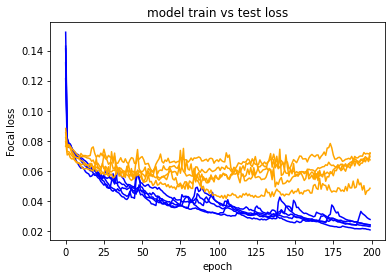

reg:  1e-06
weighted F1 score : 69.532% (+/-1.857)
Macro F1 score : 36.922% (+/-2.022)
Proportional F1 score : 4.145% (+/-0.430)
Accuracy : 93.698% (+/-0.608)
Loss : 0.052% (+/-0.004)
Mean F1 score per label:  [[0.11473399 0.70181325 0.42796294 0.74560657 0.00201401 0.
  0.11423332 0.84735852]]
Mean precision per label:  [[0.31979916 0.72957054 0.56086674 0.71762074 0.01110278 0.
  0.34282564 0.86263635]]
Mean recall per label:  [[0.08317787 0.68142058 0.36869539 0.77780943 0.00112888 0.
  0.06892751 0.83539349]]


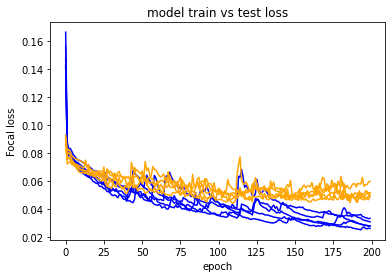

reg:  1e-05
weighted F1 score : 68.800% (+/-4.017)
Macro F1 score : 38.311% (+/-3.537)
Proportional F1 score : 4.567% (+/-0.507)
Accuracy : 93.371% (+/-1.032)
Loss : 0.059% (+/-0.010)
Mean F1 score per label:  [[0.11917193 0.71705917 0.51000589 0.78056852 0.00841822 0.
  0.09325952 0.83643557]]
Mean precision per label:  [[0.21154726 0.69691081 0.57950913 0.75059131 0.0306383  0.
  0.26451657 0.87563465]]
Mean recall per label:  [[0.08650631 0.74533288 0.46627266 0.82139388 0.00506013 0.
  0.06290236 0.80480226]]


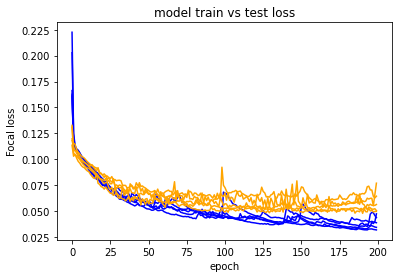

reg:  0.0001
weighted F1 score : 69.848% (+/-3.588)
Macro F1 score : 36.922% (+/-4.193)
Proportional F1 score : 4.054% (+/-0.897)
Accuracy : 93.981% (+/-0.491)
Loss : 0.056% (+/-0.005)
Mean F1 score per label:  [[0.15989325 0.75768685 0.39571545 0.75359721 0.00722892 0.
  0.02167586 0.85795337]]
Mean precision per label:  [[0.29281456 0.75935253 0.56548446 0.70717605 0.048      0.
  0.11054472 0.87749834]]
Mean recall per label:  [[0.11530635 0.75942259 0.33341677 0.81449047 0.00390879 0.
  0.01209204 0.83986592]]


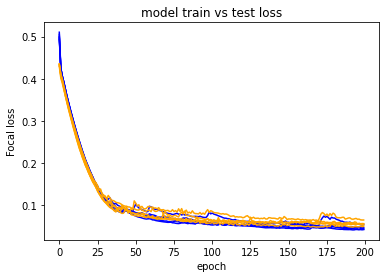

In [ ]:
X, Y = load_training_data()
train, test, val = train_te_val_split(X,Y)
X_tr = np.vstack((train[0], val[0]))
Y_tr = np.vstack((train[1], val[1])) 
for reg in[1e-7, 1e-6, 1e-5, 1e-4]:
  print("reg: ", reg)
  run_exp_hist(X_tr, Y_tr, test[0], test[1], node = 100, m_type=1, dropout = 0.1, CV = True, reg = reg)

## **Evaluating on test set**

Stack train and validation sets to build final train set

In [ ]:
X_tr = np.vstack((train[0], val[0]))
Y_tr = np.vstack((train[1], val[1]))

Training versus test
weighted F1 score : 76.238% (+/-2.364)
Macro F1 score : 43.710% (+/-3.547)
Proportional F1 score : 5.479% (+/-0.764)
Accuracy : 94.540% (+/-0.556)
Loss : 0.043% (+/-0.004)
Mean F1 score per label:  [0.2203001  0.7924726  0.56228151 0.80885853 0.09034478 0.
 0.15357091 0.86895206]
Mean precision per label:  [[0.25545694 0.86204052 0.64623297 0.8239177  0.18730772 0.
  0.20403526 0.88089966]]
Mean recall per label:  [[0.20121765 0.73573852 0.5111111  0.80167094 0.06752    0.
  0.13637192 0.85752106]]


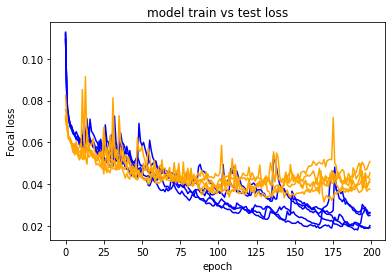

(array([[79.70719337, 48.61264229,  6.39751237],
        [76.15579367, 45.88788152,  6.23827562],
        [72.31351137, 38.23308349,  4.38191124],
        [76.92437172, 44.10330951,  5.43696568],
        [76.09133124, 41.7118609 ,  4.93800136]]),
 [[0.232841000371502,
   0.7933243158983133,
   0.7138554092552332,
   0.8784241331382664,
   0.09039547704428946,
   0,
   0.2826510670752042,
   0.8975198622971657],
  [0.19521912236729705,
   0.7843003350456925,
   0.5777351132453163,
   0.8568813133241882,
   0.22577422580691334,
   0,
   0.17467614009453566,
   0.8564445245064943],
  [0.22546972931916018,
   0.7435582905302641,
   0.44578314759567295,
   0.6931859867771596,
   0.024748645802202755,
   0,
   0.07956844089360059,
   0.8463325414028019],
  [0.22930903957135684,
   0.8433658628772414,
   0.537931069504007,
   0.8044988407123639,
   0.08793970259027234,
   0,
   0.15677491946239436,
   0.8684452735467753],
  [0.21866163176915712,
   0.7978142024742264,
   0.5361028313264165,
 

In [19]:
run_exp_hist(X_tr, Y_tr, test[0], test[1], repeats = 5, gamma = 2, node=600, dropout = 0.1, m_type=1, CV = False)


Single run on test set on best model architecture. 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 720, 1200)         3244800   
_________________________________________________________________
dropout (Dropout)            (None, 720, 1200)         0         
_________________________________________________________________
dense (Dense)                (None, 720, 8)            9608      
Total params: 3,254,408
Trainable params: 3,254,408
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 6ms/step - loss: 0.0519 - binary_accuracy: 0.9509 - precision: 0.8200 - recall: 0.7833 - false_negatives: 4573.0000 - false_positives: 3629.0000
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlo

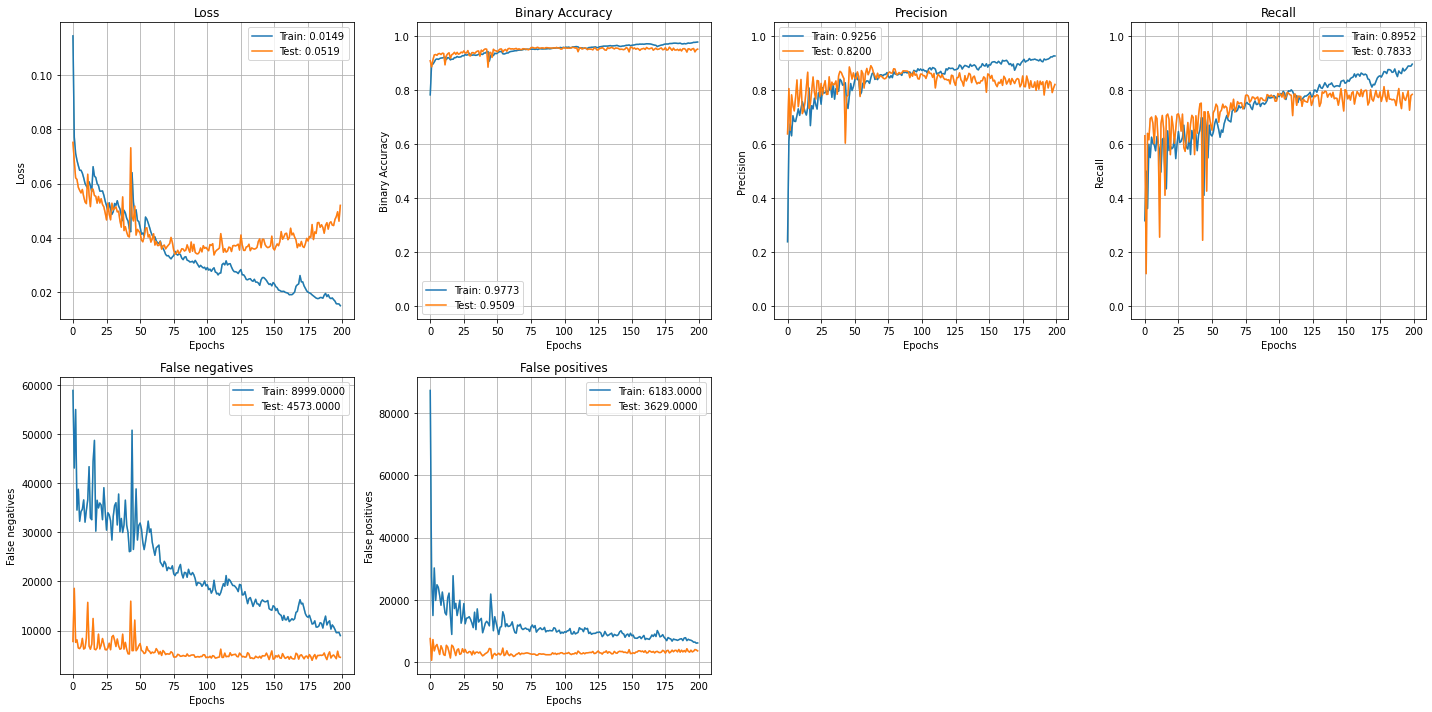

In [21]:
hist, loss, accuracy, wf1, wf1_, mf1, F1_tab, Ptab, Rtab = evaluate_model(X_tr, Y_tr, test[0], test[1], model_type = 1, nodes_nb = 600, drop = 0.1, epochs = 200, verbose = 1, plot = 1, single_run = 1)

0.4766184

Building predictions

In [28]:
predict(test[0], test[1],'opt_LSTM_model')

Loaded model from disk
1/1 [==============================] - 0s 3ms/step - loss: 0.0519 - binary_accuracy: 0.9509 - precision_7: 0.8200 - recall_7: 0.7833 - false_negatives_4: 4573.0000 - false_positives_4: 3629.0000
F1 score per label:  [0.24505423383177624, 0.7880215456318849, 0.709132775633303, 0.8481911975295905, 0.21052631395033383, 0, 0.1155234716767375, 0.8964978626271298]
Precision per label:  [0.21098901, 0.8670863, 0.66, 0.8525974, 0.48554912, 0.0, 0.1699115, 0.8873499]
Recall per label:  [0.29223743, 0.7221708, 0.76616913, 0.84383035, 0.1344, 0.0, 0.0875114, 0.90583634]
Macro F1 score:  0.4766184  ; Weighted F1 score:  0.7885004  ; Proportional F1 score:  0.06665680907560599
Prediction will be saved into Results/


array([9., 9., 8.])

In [33]:
from google.colab import files
! zip -r Results.zip Results/opt_LSTM_model
files.download("Results.zip")

  adding: Results/opt_LSTM_model/ (stored 0%)
  adding: Results/opt_LSTM_model/assets/ (stored 0%)
  adding: Results/opt_LSTM_model/saved_model.pb (deflated 90%)
  adding: Results/opt_LSTM_model/variables/ (stored 0%)
  adding: Results/opt_LSTM_model/variables/variables.index (deflated 65%)
  adding: Results/opt_LSTM_model/variables/variables.data-00000-of-00001 (deflated 6%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>